Perform bag-of-words approach (count occurrence, normalized count occurrence), TF-IDF on data. 
Create embeddings using Word2Vec.

In [1]:
import numpy as np
import pandas as pd
import collections
import nltk
import gensim
import string
from gensim.models import Word2Vec
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
    # Download stopwords and initialize lemmatizer
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

True

In [2]:
# documents = [
#     "The quick brown fox jumps over the lazy dog",
#     "The lazy dog likes to sleep all day", 
#     "The brown fox prefers to eat cheese", 
#     "The red fox jumps over the brown fox",
#     "The brown dog chases the fox"
# ]
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "This is a sample document for testing the bag of words function.",
    "NLTK provides useful useful tools for text preprocessing.",
    "Bag of words is a simple and effective method for text representation.",
    "Machine learning algorithms often use bag of words as input features."
]
# documents = [
#     "I love to wacth movie",
#     "I like to play cricket",
#     "I love singing"
# ]

In [3]:
def preprocess_text(documents):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # tokenize documents, remove stop words, and lemmatize
    tokens = []
    for document in documents:
        words = word_tokenize(document.lower())
        filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
        tokens.append(filtered_words)
    return tokens

In [4]:
tokens = preprocess_text(documents)
print(tokens)
# create vocabulary
vocabulary = list(set([word for document in tokens for word in document]))
print("Vocabulary: ", vocabulary)

[['quick', 'brown', 'fox', 'jump', 'lazy', 'dog'], ['sample', 'document', 'testing', 'bag', 'word', 'function'], ['nltk', 'provides', 'useful', 'useful', 'tool', 'text', 'preprocessing'], ['bag', 'word', 'simple', 'effective', 'method', 'text', 'representation'], ['machine', 'learning', 'algorithm', 'often', 'use', 'bag', 'word', 'input', 'feature']]
Vocabulary:  ['machine', 'fox', 'document', 'provides', 'sample', 'use', 'text', 'brown', 'input', 'simple', 'jump', 'tool', 'effective', 'preprocessing', 'feature', 'bag', 'learning', 'quick', 'function', 'algorithm', 'useful', 'word', 'often', 'testing', 'nltk', 'dog', 'representation', 'lazy', 'method']


In [5]:
def bag_of_words_countcoocurence(documents):    
    # create BoW vectors
    bow_vectors = []
    for document in tokens:
        bow_vector = np.zeros(len(vocabulary))
        word_counts = Counter(document)
        print("Word Count: ",word_counts)
        for i, word in enumerate(vocabulary):
            if word in word_counts:
                bow_vector[i] = word_counts[word]
        bow_vectors.append(bow_vector)

    return pd.DataFrame(bow_vectors, columns=vocabulary)

In [6]:
bag_of_words_countcoocurence(documents)

Word Count:  Counter({'quick': 1, 'brown': 1, 'fox': 1, 'jump': 1, 'lazy': 1, 'dog': 1})
Word Count:  Counter({'sample': 1, 'document': 1, 'testing': 1, 'bag': 1, 'word': 1, 'function': 1})
Word Count:  Counter({'useful': 2, 'nltk': 1, 'provides': 1, 'tool': 1, 'text': 1, 'preprocessing': 1})
Word Count:  Counter({'bag': 1, 'word': 1, 'simple': 1, 'effective': 1, 'method': 1, 'text': 1, 'representation': 1})
Word Count:  Counter({'machine': 1, 'learning': 1, 'algorithm': 1, 'often': 1, 'use': 1, 'bag': 1, 'word': 1, 'input': 1, 'feature': 1})


,machine,fox,document,provides,sample,use,text,brown,input,simple,...,algorithm,useful,word,often,testing,nltk,dog,representation,lazy,method
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def bag_of_words_normalized(documents):    
    # Create BoW vectors with normalized counts
    bow_vectors = []
    for document in tokens:
        bow_vector = np.zeros(len(vocabulary))
        word_counts = Counter(document)
        print("Word Count: ", word_counts)
        total_words = len(document)
        for i, word in enumerate(vocabulary):
            if word in word_counts:
                # Count occurrence
                count_occurrence = word_counts[word]
                # Normalized count occurrence
                normalized_count = count_occurrence / total_words
                bow_vector[i] = normalized_count
        bow_vectors.append(bow_vector)

    # Convert BoW vectors to DataFrame
    return pd.DataFrame(bow_vectors, columns=vocabulary)

In [8]:
bag_of_words_normalized(documents)

Word Count:  Counter({'quick': 1, 'brown': 1, 'fox': 1, 'jump': 1, 'lazy': 1, 'dog': 1})
Word Count:  Counter({'sample': 1, 'document': 1, 'testing': 1, 'bag': 1, 'word': 1, 'function': 1})
Word Count:  Counter({'useful': 2, 'nltk': 1, 'provides': 1, 'tool': 1, 'text': 1, 'preprocessing': 1})
Word Count:  Counter({'bag': 1, 'word': 1, 'simple': 1, 'effective': 1, 'method': 1, 'text': 1, 'representation': 1})
Word Count:  Counter({'machine': 1, 'learning': 1, 'algorithm': 1, 'often': 1, 'use': 1, 'bag': 1, 'word': 1, 'input': 1, 'feature': 1})


,machine,fox,document,provides,sample,use,text,brown,input,simple,...,algorithm,useful,word,often,testing,nltk,dog,representation,lazy,method
0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000
1,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.285714,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857
4,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,...,0.111111,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
def calculate_tf(term_counts, doc_length):
    return term_counts / doc_length

def calculate_idf(documents, term):
    doc_with_term = sum(1 for document in documents if term in document)
    return np.log(len(documents) / (doc_with_term))

def calculate_tfidf(tf_matrix, idf_matrix):
    return tf_matrix * idf_matrix

def tfidf(documents):
    print(tokens)
    print("Vocubaluary:", vocabulary)
    # create TF matrix
    tf_matrix = pd.DataFrame(0, index=range(len(documents)), columns=vocabulary)
    for i, document in enumerate(tokens):
        term_counts = Counter(document)
        print("Term counts: ",term_counts)
        doc_length = len(document)
        print("doc_length: ", doc_length)
        for term, count in term_counts.items():
            tf_matrix.at[i, term] = calculate_tf(count, doc_length)

    # create IDF matrix
    idf_matrix = pd.Series(0.0, index=vocabulary)
    for term in vocabulary:
        idf_matrix[term] = calculate_idf(tokens, term)

    # calculate TF-IDF matrix
    tfidf_matrix = calculate_tfidf(tf_matrix, idf_matrix)

    return tfidf_matrix

tfidf_matrix = tfidf(documents)
print("TF-IDF matrix:")
print(tfidf_matrix)

[['quick', 'brown', 'fox', 'jump', 'lazy', 'dog'], ['sample', 'document', 'testing', 'bag', 'word', 'function'], ['nltk', 'provides', 'useful', 'useful', 'tool', 'text', 'preprocessing'], ['bag', 'word', 'simple', 'effective', 'method', 'text', 'representation'], ['machine', 'learning', 'algorithm', 'often', 'use', 'bag', 'word', 'input', 'feature']]
Vocubaluary: ['machine', 'fox', 'document', 'provides', 'sample', 'use', 'text', 'brown', 'input', 'simple', 'jump', 'tool', 'effective', 'preprocessing', 'feature', 'bag', 'learning', 'quick', 'function', 'algorithm', 'useful', 'word', 'often', 'testing', 'nltk', 'dog', 'representation', 'lazy', 'method']
Term counts:  Counter({'quick': 1, 'brown': 1, 'fox': 1, 'jump': 1, 'lazy': 1, 'dog': 1})
doc_length:  6
Term counts:  Counter({'sample': 1, 'document': 1, 'testing': 1, 'bag': 1, 'word': 1, 'function': 1})
doc_length:  6
Term counts:  Counter({'useful': 2, 'nltk': 1, 'provides': 1, 'tool': 1, 'text': 1, 'preprocessing': 1})
doc_length: 

C:\Users\Yuvraj Pardeshi\AppData\Local\Temp\ipykernel_18028\3282971239.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tf_matrix.at[i, term] = calculate_tf(count, doc_length)
C:\Users\Yuvraj Pardeshi\AppData\Local\Temp\ipykernel_18028\3282971239.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tf_matrix.at[i, term] = calculate_tf(count, doc_length)
C:\Users\Yuvraj Pardeshi\AppData\Local\Temp\ipykernel_18028\3282971239.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16666666666666666' has dtype incompatible wit

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def bag_of_words(documents):    
    # Preprocess the documents
    tokens = preprocess_text(documents)
    
    # Train Word2Vec model
    model = Word2Vec(tokens, window=3, min_count=1, workers=4)
    
    # Create vocabulary
    vocabulary = list(model.wv.index_to_key)
    print("Vocabulary: ", vocabulary)

    # Create word embeddings for words in the vocabulary
    embeddings = {}
    for word in vocabulary:
        embeddings[word] = model.wv[word]
        print(f"Word: {word}, Embedding: {embeddings[word]}")

    # Convert embeddings to DataFrame
    embeddings_df = pd.DataFrame(embeddings.values(), index=embeddings.keys())

    # Reduce dimensionality to 2 dimensions using PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_df)

    # Convert reduced embeddings to DataFrame
    embeddings_2d_df = pd.DataFrame(embeddings_2d, index=embeddings.keys(), columns=['PC1', 'PC2'])
    
    return embeddings_2d_df

# Example usage:
# documents = ["This is the first document.", "This document is the second document."]
word_embeddings_2d = bag_of_words(documents)
print(word_embeddings_2d)

Vocabulary:  ['bag', 'word', 'useful', 'text', 'provides', 'brown', 'fox', 'jump', 'lazy', 'dog', 'sample', 'document', 'testing', 'function', 'nltk', 'feature', 'input', 'tool', 'preprocessing', 'simple', 'effective', 'method', 'representation', 'machine', 'learning', 'algorithm', 'often', 'use', 'quick']
Word: bag, Embedding: [-5.4318266e-04  2.4406970e-04  5.0974530e-03  9.0097673e-03
 -9.3018096e-03 -7.1170214e-03  6.4581176e-03  8.9717507e-03
 -5.0241346e-03 -3.7598398e-03  7.3751118e-03 -1.5313404e-03
 -4.5410800e-03  6.5536611e-03 -4.8572151e-03 -1.8131746e-03
  2.8788990e-03  9.9826464e-04 -8.2871895e-03 -9.4559481e-03
  7.3131593e-03  5.0681210e-03  6.7649051e-03  7.6128339e-04
  6.3554998e-03 -3.4033060e-03 -9.5036242e-04  5.7652886e-03
 -7.5244275e-03 -3.9333529e-03 -7.5012399e-03 -9.3095173e-04
  9.5400382e-03 -7.3262001e-03 -2.3288564e-03 -1.9382448e-03
  8.0763521e-03 -5.9217331e-03  4.9289778e-05 -4.7575091e-03
 -9.6031595e-03  5.0001242e-03 -8.7627321e-03 -4.3865489e-03

In [11]:
def plot_embeddings(embeddings_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_df['PC1'], embeddings_df['PC2'], color='b')

    # Add labels to each point
    for word, (x, y) in embeddings_df.iterrows():
        plt.annotate(word, (x, y), fontsize=8)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('2D Word Embeddings')
    plt.grid(True)
    plt.show()

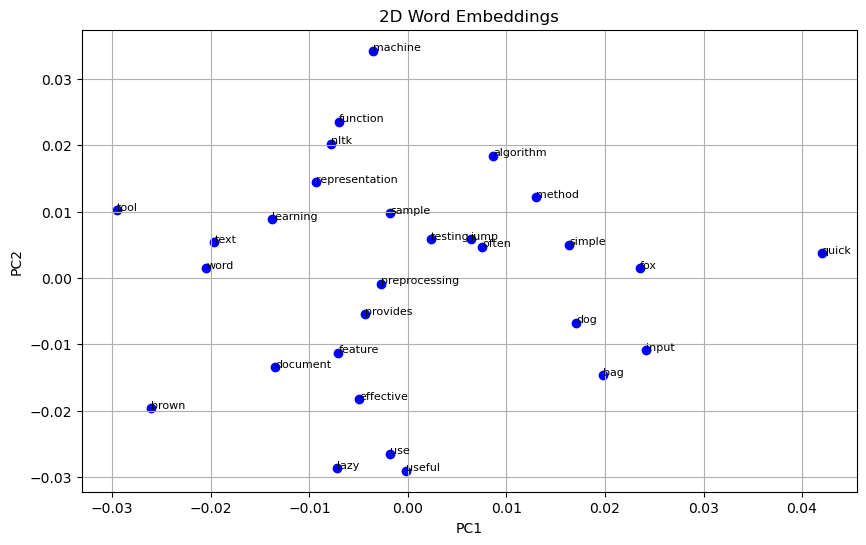

In [12]:
plot_embeddings(word_embeddings_2d)

In [13]:
model = Word2Vec(tokens, window=3, min_count=1, workers=4)
model.corpus_count

5

In [14]:
model.train(tokens,total_examples=model.corpus_count,epochs=model.epochs)

(30, 175)

In [15]:
model.save('./word2vec.model')

In [16]:
model.wv.most_similar('nltk')

[('tool', 0.24668973684310913),
 ('text', 0.17841403186321259),
 ('machine', 0.1712951809167862),
 ('simple', 0.1620364785194397),
 ('word', 0.16099435091018677),
 ('use', 0.10764224827289581),
 ('jump', 0.10569509118795395),
 ('testing', 0.092210553586483),
 ('input', 0.04897860810160637),
 ('representation', 0.03911994770169258)]